<a href="https://colab.research.google.com/github/froggyroot/2024bootcamp/blob/main/%5BTUstore_ord%5D%EC%A0%84%EC%B2%98%EB%A6%AC%EB%8B%A8%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표 설정 :
- 상품 분류 ( 간식, 음료 , 주류 )
- 세트 메뉴 분해
- 간식 갯수와 음료 갯수로 고객 type 분류

>

데이터 설정 :
- tustore_ord.csv

데이터 EDA & 전처리 과정

[ 데이터 확인 ]
- 데이터 불러오기
- 데이터 유형 확인

[ 데이터 정제 ]

<1단계>
- 결측치 처리
- 사용하지 않는 컬럼 삭제
- 새 컬럼 추가  
[ type 컬럼 : 간식, 음료, 세트로 구분 ]

<2단계>
- 세트 메뉴를 간식과 음료 or 주류로 분할.
- 새 컬럼 추가

[ snack 컬럼 : 간식 갯수 넣기 ]
[ drink 컬럼 : 음료 & 주류 갯수 넣기 ]


In [2]:
import pandas as pd

# csv 파일 읽어오는 함수 (read_csv)
df = pd.read_csv("/content/tustore_ord.csv", encoding='cp949', sep=';')

# 데이터 잘 구분되어 들어왔는지 확인.
df.head()

,ord_id,ord_dt,goods_nm,store_id,billno,ord_time,ord_qty,ord_amt,goods_cd,ord_day,ord_weather,store_nm
0,1,20231125,캬라멜팝콘(M),2,73,1956,1,5000,40863,금,비,2번출구
1,2,20231030,무알콜 맥주,1,293,1912,2,18182,40860,일,맑음,1번출구
2,3,20231109,아이스 아메리카노,1,43,1931,1,4545,413,수,흐림,1번출구
3,4,20231019,캬라멜팝콘(M),1,20,1925,1,5000,40863,수,맑음,1번출구
4,5,20231112,츄러스,1,109,1328,1,4545,15867,토,비,1번출구


In [3]:
# 데이터 몇 행, 몇 열인지 확인
df.shape

(40000, 12)

In [4]:
# null값 있는지 확인
df.isnull().sum()

ord_id         0
ord_dt         0
goods_nm       0
store_id       0
billno         0
ord_time       0
ord_qty        0
ord_amt        0
goods_cd       0
ord_day        0
ord_weather    0
store_nm       0
dtype: int64

In [5]:
# goods_nm 열의 종류와 그 개수를 구하기
goods_nm_counts = df['goods_nm'].value_counts()

# 결과 출력
print(goods_nm_counts)


# 음료 = ['생수', '코카콜라', '아이스 아메리카노', '아메리카노(HOT)', '토레타', '카페라떼', '핫초코',
#       '미닛메이드 오렌지', '아이스티(복숭아)', '미닛메이드 포도', '허브티', '밀키스', '쵸코라떼 (HOT)','스프라이트']
# 세트 = ['Sweet ComboSet', 'Double ComboSet', 'Single Set', 'Family set', 'Beer set']
# 주류 = ['테라(캔)', '무알콜 맥주', '사케', '하이볼']

# 나머지는 간식으로 구분


goods_nm
츄러스                6316
캬라멜팝콘(M)           6283
생수                 5852
코카콜라               2307
캬라멜 팝콘(L)          2170
아이스 아메리카노          1421
치즈핫도그              1350
테라(캔)              1335
Sweet ComboSet     1295
아메리카노(HOT)         1229
후라이드치킨             1221
스프라이트              1202
아이스티(복숭아)          1077
오리지널 팝콘(M)          756
Single set          733
프레즐                 683
토레타                 648
카페라떼                620
핫초코                 606
미닛메이드 오렌지           448
Beer set            362
무알콜 맥주              267
핫바                  251
미닛메이드 포도            239
허브티                 226
오리지널 팝콘(L)          185
밀키스                 174
Single Set          164
Family set          153
하겐다즈 쵸코             132
하겐다즈 딸기             105
하겐다즈 바닐라             97
사케                   34
하이볼                  20
쵸코라떼 (HOT)           19
Double ComboSet      13
스트로베리 조각케잌            7
Name: count, dtype: int64


In [10]:
# < 1단계 통 코드 >
# [ 데이터 읽어오고, 카테고리 구분, 날짜랑 시간 형식 변경 ]

import pandas as pd

# csv 파일 읽어오는 함수 (read_csv)
df = pd.read_csv("/content/tustore_ord.csv", encoding='cp949', sep=';')

# 데이터 잘 구분되어 들어왔는지 확인.
df.head()

# 음료, 세트, 주류, 간식을 구분하는 함수 정의
def categorize_goods(goods_nm):
    음료 = ['생수', '코카콜라', '아이스 아메리카노', '아메리카노(HOT)', '토레타', '카페라떼', '핫초코',
          '미닛메이드 오렌지', '아이스티(복숭아)', '미닛메이드 포도', '허브티', '밀키스', '쵸코라떼 (HOT)','스프라이트']
    세트 = ['Sweet ComboSet', 'Double ComboSet', 'Single Set', 'Family set', 'Beer set']
    주류 = ['테라(캔)', '무알콜 맥주', '사케', '하이볼']

    if goods_nm in 음료:
        return '음료'
    elif goods_nm in 세트:
        return '세트'
    elif goods_nm in 주류:
        return '주류'
    else:
        return '간식'

# 카테고리별로 구분할 'type' 컬럼 추가
df['type'] = df['goods_nm'].apply(categorize_goods)

# 날짜 형식으로 변환
df['ord_dt'] = pd.to_datetime(df['ord_dt'], format='%Y%m%d')

# 시간 형식 변환 ('HH:MM' 형식)
df['ord_time'] = df['ord_time'].astype(str).str.zfill(4)
df['ord_time'] = df['ord_time'].str[:2] + ':' + df['ord_time'].str[2:]

# 좀 더 깔끔하게 보기 위해서 ord_id, goods_cd, store_nm 열 삭제
  # ord_id < 시리얼 번호 필요 X
  # goods_cd < 상품코드 필요 X
  # store_nm < store_id로 판단 가능, 중복 열 삭제
  # billno < 계산서 번호 의미없다고 판단 [같은 시간, 같은 스토어, 같은 날짜인데도 다르게 나옴.]
df.drop(['ord_id', 'goods_cd', 'store_nm','billno'], axis=1, inplace=True)

# ord_dt와 ord_time 기준으로 오름차순 정렬
df.sort_values(by=['ord_dt', 'ord_time'], ascending=True, inplace=True)

# 확인해보기
df.head(20)

,ord_dt,goods_nm,store_id,ord_time,ord_qty,ord_amt,ord_day,ord_weather,type
16588,2023-10-19,아이스티(복숭아),3,19:01,1,4545,수,맑음,음료
25066,2023-10-19,생수,3,19:01,1,909,수,맑음,음료
14856,2023-10-19,스프라이트,1,19:03,1,3182,수,맑음,음료
2355,2023-10-19,생수,5,19:04,1,909,수,맑음,음료
18389,2023-10-19,프레즐,5,19:04,1,4545,수,맑음,간식
30070,2023-10-19,후라이드치킨,2,19:04,1,7273,수,맑음,간식
30992,2023-10-19,후라이드치킨,5,19:04,1,7273,수,맑음,간식
36441,2023-10-19,아이스 아메리카노,5,19:04,1,4545,수,맑음,음료
25006,2023-10-19,생수,5,19:05,1,909,수,맑음,음료
12874,2023-10-19,츄러스,3,19:06,1,4545,수,맑음,간식


In [21]:
import pandas as pd

# csv 파일 읽어오는 함수 (read_csv)
df = pd.read_csv("/content/tustore_ord.csv", encoding='cp949', sep=';')

# 데이터 잘 구분되어 들어왔는지 확인.
df.head()

# beverage, Set, alcohol, snack을 구분하는 함수 정의
def categorize_goods(goods_nm):
    beverage = ['생수', '코카콜라', '아이스 아메리카노', '아메리카노(HOT)', '토레타', '카페라떼', '핫초코',
          '미닛메이드 오렌지', '아이스티(복숭아)', '미닛메이드 포도', '허브티', '밀키스', '쵸코라떼 (HOT)','스프라이트']
    Set = ['Sweet ComboSet', 'Double ComboSet', 'Single Set', 'Family set', 'Beer set']
    alcohol = ['테라(캔)', '무알콜 맥주', '사케', '하이볼']

    if goods_nm in beverage:
        return 'beverage'
    elif goods_nm in Set:
        return 'Set'
    elif goods_nm in alcohol:
        return 'alcohol'
    else:
        return 'snack'

# 카테고리별로 구분할 'type' 컬럼 추가
df['type'] = df['goods_nm'].apply(categorize_goods)

# 날짜 형식으로 변환
df['ord_dt'] = pd.to_datetime(df['ord_dt'], format='%Y%m%d')

# 시간 형식 변환 ('HH:MM' 형식)
df['ord_time'] = df['ord_time'].astype(str).str.zfill(4)
df['ord_time'] = df['ord_time'].str[:2] + ':' + df['ord_time'].str[2:]

# ord_id, goods_cd, store_nm 열 삭제
df.drop(['ord_id', 'goods_cd', 'store_nm', 'billno'], axis=1, inplace=True)

# ord_dt와 ord_time 기준으로 오름차순 정렬
df.sort_values(by=['ord_dt', 'ord_time'], ascending=True, inplace=True)

# s_num, d_num 컬럼 추가 및 Set 분할
def sd_add(row):
    if row['type'] == 'Set':
        if row['goods_nm'] == 'Single Set':
            s_num = 1 * row['ord_qty']
            d_num = 1 * row['ord_qty']
        elif row['goods_nm'] in ['Sweet ComboSet', 'Double ComboSet', 'Beer set']:
            s_num = 1 * row['ord_qty']
            d_num = 2 * row['ord_qty']
        elif row['goods_nm'] == 'Family set':
            s_num = 4 * row['ord_qty']
            d_num = 4 * row['ord_qty']

        row['s_num'] = s_num
        row['d_num'] = d_num
    else:
        if row['type'] == 'snack':
            row['s_num'] = row['ord_qty']
            row['d_num'] = 0
        elif row['type'] in ['beverage', 'alcohol']:
            row['s_num'] = 0
            row['d_num'] = row['ord_qty']

    return row

df = df.apply(sd_add, axis=1)

# 필요한 열만 선택
df = df[['ord_dt', 'goods_nm', 'store_id', 'ord_time', 'ord_qty', 'ord_amt', 'ord_day', 'ord_weather', 'type', 's_num', 'd_num']]

# 확인해보기
df.head(20)

,ord_dt,goods_nm,store_id,ord_time,ord_qty,ord_amt,ord_day,ord_weather,type,s_num,d_num
16588,2023-10-19,아이스티(복숭아),3,19:01,1,4545,수,맑음,beverage,0,1
25066,2023-10-19,생수,3,19:01,1,909,수,맑음,beverage,0,1
14856,2023-10-19,스프라이트,1,19:03,1,3182,수,맑음,beverage,0,1
2355,2023-10-19,생수,5,19:04,1,909,수,맑음,beverage,0,1
18389,2023-10-19,프레즐,5,19:04,1,4545,수,맑음,snack,1,0
30070,2023-10-19,후라이드치킨,2,19:04,1,7273,수,맑음,snack,1,0
30992,2023-10-19,후라이드치킨,5,19:04,1,7273,수,맑음,snack,1,0
36441,2023-10-19,아이스 아메리카노,5,19:04,1,4545,수,맑음,beverage,0,1
25006,2023-10-19,생수,5,19:05,1,909,수,맑음,beverage,0,1
12874,2023-10-19,츄러스,3,19:06,1,4545,수,맑음,snack,1,0


코렙에서 matplotlib 한글 폰트를 적용하는 방법
안 먹히는 이유 찾아보기

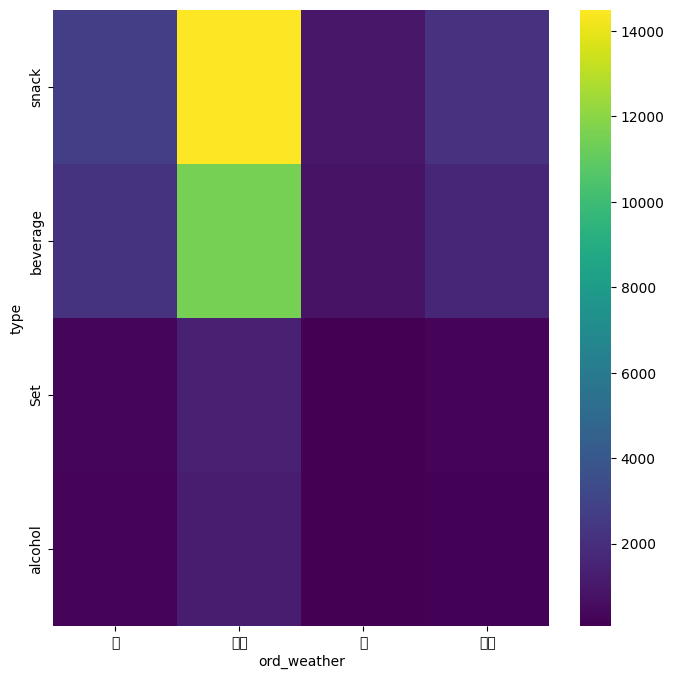

In [29]:
# @title ord_weather vs type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in df.groupby('ord_weather')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ord_weather')
_ = plt.ylabel('type')

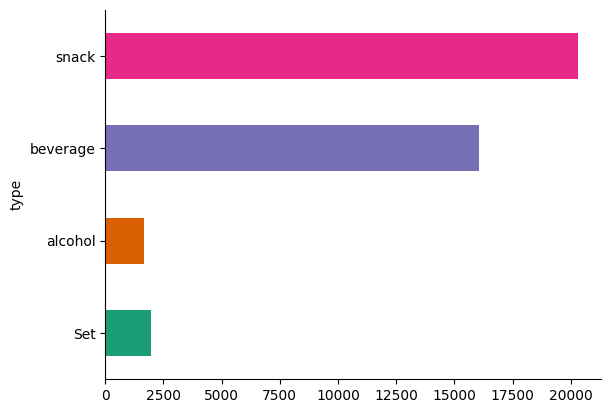

In [28]:
# @title type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)